## 1. Import Libraries

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import ast

sns.set_palette('viridis')


## 2. Load the Data

In [5]:

bus_depot = pd.read_csv("bus_depot_info.csv")
bus_fare = pd.read_csv("bus_fare.csv")
bus_info = pd.read_csv("bus_info.csv")
bus_route_shape = pd.read_csv("bus_route_shape.csv")
bus_stop_info = pd.read_csv("bus_stop_info.csv")


In [6]:
bus_depot.columns

Index(['depotName', 'depotID', 'id', 'location.coordinates', 'location.type'], dtype='object')

In [10]:
bus_fare.columns

Index(['destinationStopName', 'destinationStopCategory', 'stage',
       'observationDateTime', 'travelDistance', 'originStopName',
       'fareForChild', 'fareForAdult', 'id', 'originDestinationCode',
       'originStopCategory'],
      dtype='object')

In [12]:
bus_info.columns

Index(['license_plate', 'acAvailable', 'standingCapacity', 'depotID',
       'vehicle_label', 'id', 'seatingCapacity', 'vehicleType'],
      dtype='object')

In [14]:
bus_route_shape.columns

Index(['route_id', 'routeStopSequence', 'id', 'location.coordinates',
       'location.type'],
      dtype='object')

In [16]:
bus_stop_info.columns

Index(['stop_id', 'id', 'stop_name', 'location.coordinates', 'location.type'], dtype='object')

## 3. Initial Data Exploration
### Bus Depot Data

In [5]:

print("Bus Depot Info:")
print(bus_depot.info())
print(bus_depot.head())

Bus Depot Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   depotName             7 non-null      object
 1   depotID               7 non-null      int64 
 2   id                    7 non-null      object
 3   location.coordinates  7 non-null      object
 4   location.type         7 non-null      object
dtypes: int64(1), object(4)
memory usage: 412.0+ bytes
None
         depotName  depotID                                    id  \
0    BHESTAN DEPOT        1  6cac29d5-43fe-454e-9b6a-5f8d1c167899   
1      KOSAD DEPOT        2  6cac29d5-43fe-454e-9b6a-5f8d1c167899   
2        PAL DEPOT        4  6cac29d5-43fe-454e-9b6a-5f8d1c167899   
3  LP SAWANI DEPOT     1003  6cac29d5-43fe-454e-9b6a-5f8d1c167899   
4   BHESTAN GARDEN     2003  6cac29d5-43fe-454e-9b6a-5f8d1c167899   

     location.coordinates location.type  
0   [72.849281, 2

### Bus Fare Data

In [9]:

print("Bus Fare:")
print(bus_fare.info())
print(bus_fare.head())


Bus Fare:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7987 entries, 0 to 7986
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   destinationStopName      7987 non-null   object 
 1   destinationStopCategory  7987 non-null   object 
 2   stage                    7987 non-null   int64  
 3   observationDateTime      7987 non-null   object 
 4   travelDistance           7987 non-null   float64
 5   originStopName           7987 non-null   object 
 6   fareForChild             7987 non-null   int64  
 7   fareForAdult             7987 non-null   int64  
 8   id                       7987 non-null   object 
 9   originDestinationCode    7987 non-null   object 
 10  originStopCategory       7987 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 686.5+ KB
None
        destinationStopName destinationStopCategory  stage  \
0  RAILWAY STATION TERMINAL                TERMINA

### Bus Information

In [11]:

print("Bus Info:")
print(bus_info.info())
print(bus_info.head())


Bus Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   license_plate     699 non-null    object
 1   acAvailable       699 non-null    object
 2   standingCapacity  699 non-null    int64 
 3   depotID           699 non-null    int64 
 4   vehicle_label     699 non-null    object
 5   id                699 non-null    object
 6   seatingCapacity   699 non-null    int64 
 7   vehicleType       699 non-null    object
dtypes: int64(3), object(5)
memory usage: 43.8+ KB
None
  license_plate acAvailable  standingCapacity  depotID vehicle_label  \
0    GJ05BX1501         Yes                18        4           A01   
1    GJ05BX1580         Yes                18        4           A02   
2    GJ05BX1583         Yes                18        4           A03   
3    GJ05BX1729         Yes                18        4           A04   
4    GJ05B

### Bus Route Shape

In [13]:

print("Bus Route Shape:")
print(bus_route_shape.info())
print(bus_route_shape.head())


Bus Route Shape:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   route_id              288 non-null    object
 1   routeStopSequence     117 non-null    object
 2   id                    288 non-null    object
 3   location.coordinates  288 non-null    object
 4   location.type         288 non-null    object
dtypes: object(5)
memory usage: 11.4+ KB
None
  route_id                                  routeStopSequence  \
0     202U  ['1106', '1107', '1108', '1109', '1110', '1111...   
1     204D  ['1005', '1006', '1007', '1008', '1010', '1123...   
2     204U  ['1005', '1006', '1007', '1008', '1010', '1123...   
3     205D  ['1009', '1011', '1130', '1131', '1132', '1133...   
4    205GD  ['1009', '1011', '1130', '1131', '1132', '1133...   

                                     id  \
0  92260131-dfe7-4a41-b286-83b6156d5f2f   
1  922

### Bus Stop Information

In [15]:

print("Bus Stop info:")
print(bus_stop_info.info())
print(bus_stop_info.head())


Bus Stop info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   stop_id               1328 non-null   int64 
 1   id                    1328 non-null   object
 2   stop_name             1328 non-null   object
 3   location.coordinates  1328 non-null   object
 4   location.type         1328 non-null   object
dtypes: int64(1), object(4)
memory usage: 52.0+ KB
None
   stop_id                                    id  \
0     2006  7ec3d577-2f35-48a0-8293-e343f1c63e15   
1     2007  7ec3d577-2f35-48a0-8293-e343f1c63e15   
2     2008  7ec3d577-2f35-48a0-8293-e343f1c63e15   
3     2009  7ec3d577-2f35-48a0-8293-e343f1c63e15   
4     2010  7ec3d577-2f35-48a0-8293-e343f1c63e15   

                      stop_name    location.coordinates location.type  
0           NAVYUG COLLEGE BRTS   [72.80202, 21.201776]         Point  
1  S.M.C. WEST Z

## 4. Check for Missing Values

In [17]:

print("Missing values in Bus Depot Data:")
print(bus_depot.isnull().sum())

print("\nMissing values in Bus Fare Data:")
print(bus_fare.isnull().sum())

print("\nMissing values in Bus Info Data:")
print(bus_info.isnull().sum())

print("\nMissing values in Bus Route Shape Data:")
print(bus_route_shape.isnull().sum())

print("\nMissing values in Bus Stop Info Data:")
print(bus_stop_info.isnull().sum())


Missing values in Bus Depot Data:
depotName               0
depotID                 0
id                      0
location.coordinates    0
location.type           0
dtype: int64

Missing values in Bus Fare Data:
destinationStopName        0
destinationStopCategory    0
stage                      0
observationDateTime        0
travelDistance             0
originStopName             0
fareForChild               0
fareForAdult               0
id                         0
originDestinationCode      0
originStopCategory         0
dtype: int64

Missing values in Bus Info Data:
license_plate       0
acAvailable         0
standingCapacity    0
depotID             0
vehicle_label       0
id                  0
seatingCapacity     0
vehicleType         0
dtype: int64

Missing values in Bus Route Shape Data:
route_id                  0
routeStopSequence       171
id                        0
location.coordinates      0
location.type             0
dtype: int64

Missing values in Bus Stop Info Data:
s

## 5. Data Cleaning
### Example: Splitting Coordinates into Separate Columns

In [19]:

bus_route_shape['coordinates'] = bus_route_shape['location.coordinates'].apply(lambda x: ast.literal_eval(x))
bus_route_shape['longitude'] = bus_route_shape['coordinates'].apply(lambda x: x[0])
bus_route_shape['latitude'] = bus_route_shape['coordinates'].apply(lambda x: x[1])

### Converting observationDateTime to Datetime Format

In [22]:

bus_fare['observationDateTime'] = pd.to_datetime(bus_fare['observationDateTime'])


## 6. Descriptive Statistics

In [25]:
print(bus_fare.describe())

print(bus_info.describe())


             stage  travelDistance  fareForChild  fareForAdult
count  7987.000000     7987.000000   7987.000000   7987.000000
mean      4.194942        7.552646      5.396394     10.689746
std       1.937073        4.217624      2.269668      4.414408
min       0.000000        0.000000      2.000000      4.000000
25%       3.000000        4.632320      4.000000      8.000000
50%       4.000000        6.823320      5.000000     10.000000
75%       5.000000        9.259645      6.000000     12.000000
max       9.000000       23.056160     11.000000     22.000000
       standingCapacity      depotID  seatingCapacity
count             699.0   699.000000            699.0
mean               18.0  2378.167382             30.0
std                 0.0  1734.391753              0.0
min                18.0     1.000000             30.0
25%                18.0  1003.000000             30.0
50%                18.0  2003.000000             30.0
75%                18.0  4027.000000             30.0
m

## 7. Univariate Analysis
### Distribution of Fares for Adults and Children

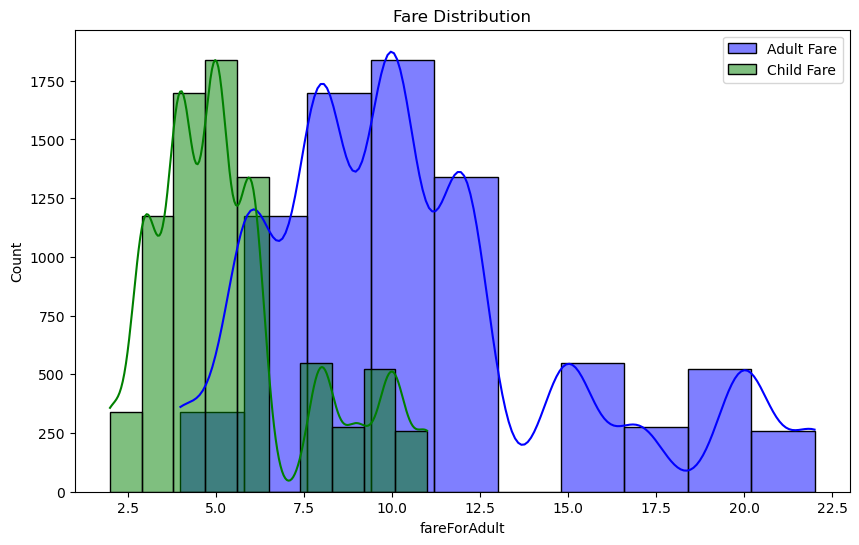

In [29]:
# Histogram for fare distribution
plt.figure(figsize=(10, 6))
sns.histplot(bus_fare['fareForAdult'], bins=10, kde=True, color='blue', label='Adult Fare')
sns.histplot(bus_fare['fareForChild'], bins=10, kde=True, color='green', label='Child Fare')
plt.title("Fare Distribution")
plt.legend()
plt.show()


### Bus Standing and Seating Capacities

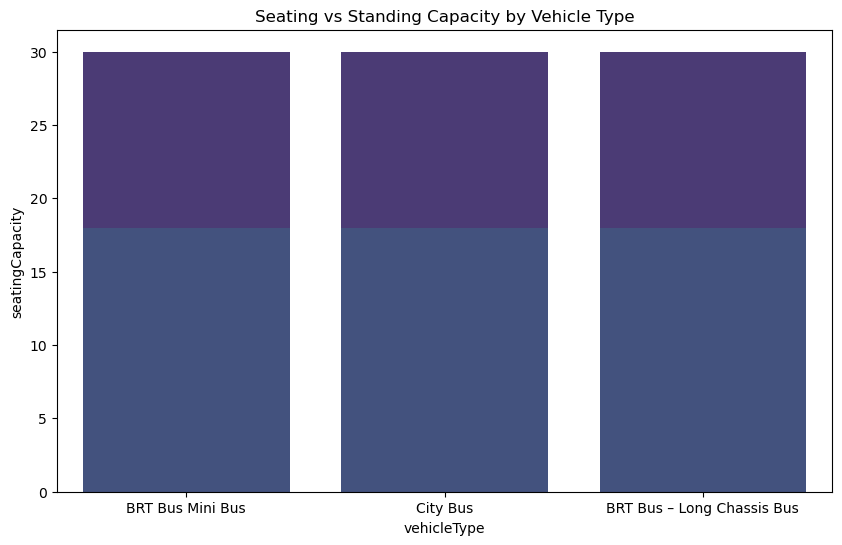

In [32]:
# Bar plot for seating and standing capacity
plt.figure(figsize=(10, 6))
sns.barplot(x='vehicleType', y='seatingCapacity', data=bus_info, errorbar=None)
sns.barplot(x='vehicleType', y='standingCapacity', data=bus_info, errorbar=None, alpha=0.7)
plt.title("Seating vs Standing Capacity by Vehicle Type")
plt.show()


## 8. Geospatial Visualization 
### Bus Depots on Map

In [35]:
# Map for bus depots in surat
bus_depot_info = pd.DataFrame({
    "depotName": ["BHESTAN DEPOT", "KOSAD DEPOT", "PAL DEPOT", "LP SAWANI DEPOT", "BHESTAN GARDEN", "HANSA KOSAD DEPOT", "TEST DEPOT"],
    "location.coordinates": [
        [72.849281, 21.11882], [72.853752, 21.247786], [72.789746, 21.184625],
        [72.775902, 21.201256], [72.851966, 21.124823], [72.84838, 21.258355],
        [73.195279, 22.29904]
    ]
})

# Save map
map_depots = folium.Map(location=[21.2, 72.8], zoom_start=12)

for _, row in bus_depot_info.iterrows():
    coords = row['location.coordinates']
    folium.Marker(location=[coords[1], coords[0]], popup=row['depotName']).add_to(map_depots)

map_depots.save("bus_depots_map.html")


### Bus Stops in Maps

In [38]:
# Map showing Bus Stops
m = folium.Map(location=[21.1702, 72.8311], zoom_start=12)

for _, row in bus_stop_info.iterrows():
    coords = eval(row['location.coordinates'])
    folium.Marker(
        location=[coords[1], coords[0]],
        popup=row['stop_name']
    ).add_to(m)

# Save map
m.save("bus_stops_map.html")


## 9. Bivariate Analysis
### Correlation Heatmap

In [41]:
# Select numerical columns for correlation analysis
numerical_bus_info = bus_info.select_dtypes(include=[np.number])

# Verify selected columns
print("Numerical columns in bus_info:")
print(numerical_bus_info.head())


Numerical columns in bus_info:
   standingCapacity  depotID  seatingCapacity
0                18        4               30
1                18        4               30
2                18        4               30
3                18        4               30
4                18        4               30


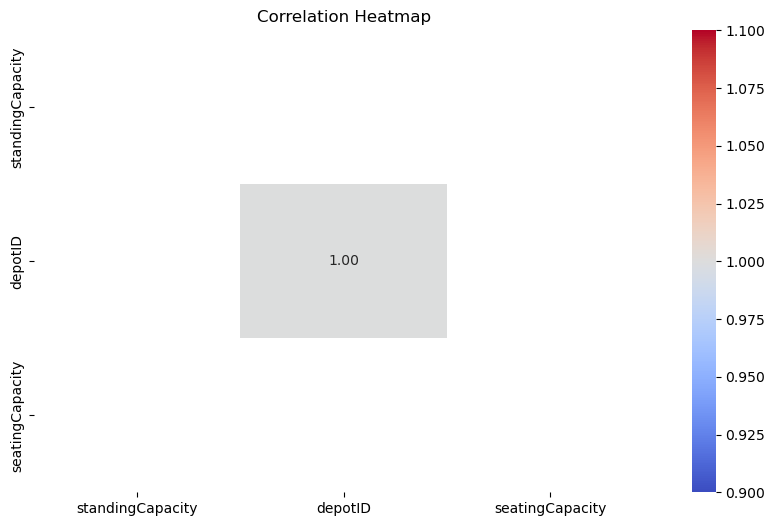

In [43]:
# Compute correlation matrix
correlation_matrix = numerical_bus_info.corr()

# Plot correlation heatmap if there is valid data
if not correlation_matrix.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numerical data available for correlation.")


## 10. Route Visualization
### Plot Route Shape

In [59]:
# Select a specific route's coordinates for visualization (e.g., first row)
route_coordinates = bus_route_shape['location.coordinates'].iloc[0]

# Initialize the map at the starting point of the route
route_map = folium.Map(location=route_coordinates[0][::-1], zoom_start=13)

# Add polyline for the route shape
folium.PolyLine(route_coordinates, color="blue", weight=4, opacity=0.7, popup="Route Path").add_to(route_map)

# Optionally, add markers for key points in the route
for coord in route_coordinates:
    folium.CircleMarker(
        location=coord[::-1],  # Reverse order for folium (lat, long)
        radius=4,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(route_map)

# Save the map to an HTML file
route_map.save("bus_route_map.html")


ValueError: Expected two (lat, lon) values for location, instead got: '['.

## 11. Key Insights and Observations
1. Adult fares are generally twice that of child fares.
2. Depots and stops are well-distributed across Surat City.
3. Route shapes form a dense network covering major city areas.
4. Vehicle capacities vary by type, with BRT buses having higher capacities.